## Data Science Assignment #10 Ali Adnan (aa05432@st.habib.edu.pk)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("C:\\Users\\Ali Adnan\\Downloads\\McDonaldsMenu.csv")

## Q1 & Q2)

In [3]:
df.drop(['Category', 'Item', 'Serving Size'], axis=1, inplace=True)


## Q3)

In [4]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)


## Q4)

In [5]:
wss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

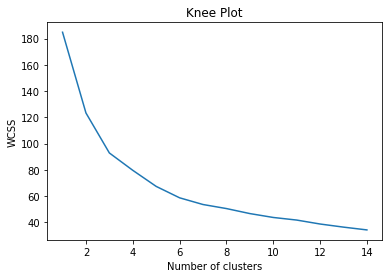

In [6]:
plt.plot(range(1, 15), wss)
plt.title('Knee Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## As we can see from the graph plotted above, we can deduce that the optimal number of clusters is 6 since the graph goes flat after the number of clusters become 6. Before that, we do see a steep point in the graph at number of clusters = 3 but the graph keeps declining rapidly instead of flatlining.

## Q5)

In [7]:
kmeans = KMeans(n_clusters = 6, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(scaled_data)


## Since the optimal number of clusters is 6, we will use that to perform K-Means CLustering.

## Q6)

Text(0.5, 1.0, 'The dataset post clustering')

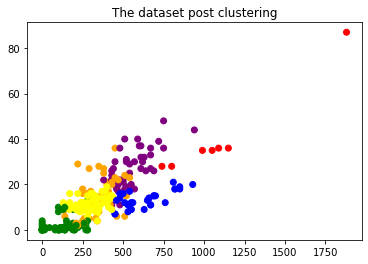

In [8]:
color2=np.array(['green','red','blue', 'yellow', 'orange', 'purple'])
plt.scatter(x=df.Calories,y=df.Protein,c=color2[kmeans.labels_])
plt.title("The dataset post clustering")


## Q7)

In [9]:
C1 = df.iloc[Y == 0, :]
C2 = df.iloc[Y == 1, :]
C3 = df.iloc[Y == 2, :]
C4 = df.iloc[Y == 3, :]
C5 = df.iloc[Y == 4, :]
C6 = df.iloc[Y == 5, :]

In [10]:
C1['Protein'].mean()

1.7611940298507462

In [11]:
C2['Protein'].mean()

40.714285714285715

In [12]:
C3['Protein'].mean()

13.533333333333333

In [13]:
C4['Protein'].mean()

11.533333333333333

In [14]:
C5['Protein'].mean()

14.270833333333334

In [15]:
C6['Protein'].mean()

26.708333333333332

## Q8)

## As we can see from the findings above, it tells us that Cluster 2 (C2) has the highest amount of protein in it which makes it the healthiest item on the menu which is usually for gym rats and wanna gain weight. The lowest amount of protein is in Cluster 1 (C1) which tells us that it's not really healthy. And Cluster 6 (C6) is an item for people who aren't looking for that much protein in their meal but don't want the item to not have protein at all, so a well balanced item.

## Q9)

## C2 = Protein Pounder (The item that contains the most protein, similar to Quarter Pounder)
## C1 = No Proteiner (The item with no protein, idea came from no brainer)
## C6 = Average Joe (The item contains an average amount of protein)